### Reading in the Classification data for CSET and adding geolocation

In [3]:
import sys
import os
os.environ['PROJ_LIB'] = '/home/disk/p/jkcm/anaconda3/envs/measures/share/proj'
sys.path.insert(0, '/home/disk/p/jkcm/Code')
import numpy as np
import pandas as pd
import datetime as dt
import glob
import matplotlib as mpl
import seaborn as sns
import glob
import matplotlib.pyplot as plt
# from Lagrangian_CSET import utils
from classified_cset.utils import plot_dataframe_by_cat
print('HALLLOOO')
labels={0: 'Closed-cellular MCC', 1: 'Clustered cumulus', 2: 'Disorganized MCC',
        3: 'Open-cellular MCC', 4: 'Solid Stratus', 5: 'Suppressed Cu'}
short_labels = {0: 'Closed MCC ', 1: 'Clust. Cu', 2: 'Disorg. MCC',
        3: 'Open MCC', 4: 'Solid St', 5: 'Supp. Cu'}

HALLLOOO


In [4]:
def unify_table_and_classifications(table, data, labels=None):
    if labels == None:
        labels={0: 'Closed-cellular MCC', 1: 'Clustered cumulus', 2: 'Disorganized MCC',
                3: 'Open-cellular MCC', 4: 'Solid Stratus', 5: 'Suppressed Cu'}
        files_to_match = np.array([i[4:-4] for i in data['files']]).astype(str)
        table = table.sort_values(by='name')
        if np.array_equal(files_to_match, table['name'].values):
            if np.array_equal(table['name'].values,sorted(table['name'].values)) and \
                np.array_equal(files_to_match,sorted(files_to_match)):
                print("we're OK")
            else:
                print("fuxed")
            table['cat'] = data['pred_cat'].astype(int)
#             table['label'] = TODO finish this line
            table['cert'] = data['pred_prob']
            return table
        else:
            for i,j in zip(sorted(files_to_match), sorted(table['name'].values)):
                if not i==j:
#                     if not i in table['name'].values:
                    print(i, j)
            
            raise ValueError("you forgot to implement this bit, buddy")
            table['label'] = np.nan
            table['class'] = np.nan
            table['cert'] = np.nan
            for index, row in table.iterrows():
                pass

In [7]:
manifs = glob.glob(r'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/sea_region/201*manifest.csv')
preds = glob.glob(r'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/sea_region/model_predictions_201*.npz')
# sea_mani = r'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/sea_region/manifest.csv'
# sea_pred = r'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/sea_region/model_predictions.npz'
all_dfs = []
for sea_mani, sea_pred in zip(manifs, preds):
    data = np.load(sea_pred)
    # data_dates = [dt.datetime.strptime(i[14:26], '%Y%j.%H%M') for i in data['files'].astype(str)]
    table_headers = ('name', 'date', 'lat', 'lon', 'i', 'j', 'sensor_zenith', 'high_cf', 'low_cf', 'refl_img', 'context_img')
    table = pd.read_csv(sea_mani, names = table_headers, parse_dates=['date'], skiprows=1)
    table.lat = pd.to_numeric(table.lat, errors='coerce')
    table.lon = pd.to_numeric(table.lon, errors='coerce')

    all_df = unify_table_and_classifications(table, data)
    all_dfs.append(all_df)
#     savename = f'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/unified_table_SEA_2001-2003.csv'    # all_df.to_csv(savename)
    # all_df.to_csv(savename)
    
all_df = pd.concat(all_dfs, ignore_index=True)
savename = f'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/unified_table_SEA_2010.csv'    # all_df.to_csv(savename)
all_df.to_csv(savename)

we're OK


In [18]:
all_df_old = pd.read_csv(f'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/unified_table_SEA_2001-2003.csv')

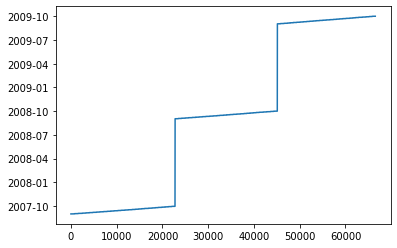

In [20]:
plt.plot(all_df.date)

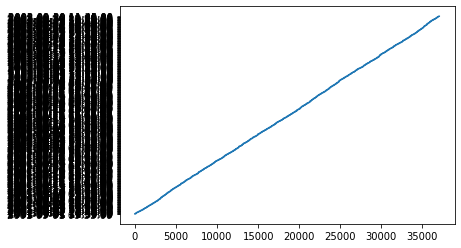

In [19]:
plt.plot(all_df.date)

In [35]:
all_df.lon

0        30.826590
1        32.239510
2        33.789406
3        35.653065
4        24.158434
           ...    
66506   -40.397293
66507   -39.250477
66508   -38.083607
66509   -36.796543
66510   -35.238041
Name: lon, Length: 66511, dtype: float64

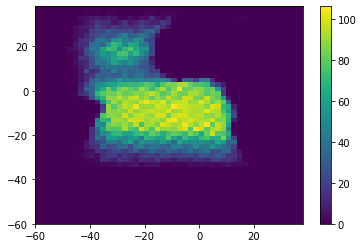

In [40]:
good = np.logical_and(~np.isnan(all_df_old.lon), ~np.isnan(all_df_old.lat))
plt.hist2d(all_df_old.lon[good], all_df_old.lat[good], bins=[np.arange(-60,40, 2), np.arange(-60, 40, 2)]);
plt.colorbar()

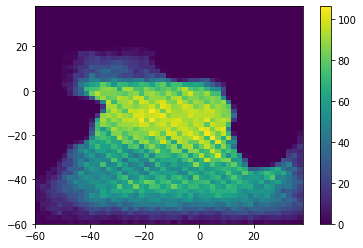

In [41]:
plt.hist2d(all_df.lon, all_df.lat, bins=[np.arange(-60,40, 2), np.arange(-60, 40, 2)]);
plt.colorbar()

In [9]:
# sep_dir = r'/home/disk/eos4/jkcm/Data/MEASURES/bet/a_data/sep_region'
sep_dir = r'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/redo'
files = sorted(os.listdir(sep_dir))
manifests = [i for i in files if 'manifest' in i and not 'allfiles' in i]
predictions = [i for i in files if '.npz' in i]
file_pairings = list(zip(manifests, predictions))
assert np.all([(i[0][:4] == i[1][:4]) for i in file_pairings])
assert np.all([(i[0][-7:-4] == i[1][-7:-4]) for i in file_pairings])
print(file_pairings)
for (manifest_file, prediction_file) in file_pairings:
    data = np.load(os.path.join(sep_dir, prediction_file))
    table_headers = ('name', 'date', 'lat', 'lon', 'i', 'j', 'sensor_zenith', 'high_cf', 'low_cf', 'refl_img', 'context_img')
    table = pd.read_csv(os.path.join(sep_dir, manifest_file), names = table_headers, parse_dates=['date'], skiprows=1)
    all_df = unify_table_and_classifications(table, data)
    savename = f'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/unified_table_{manifest_file[-7:-4]}_{manifest_file[:4]}.csv'    # all_df.to_csv(savename)
    all_df.to_csv(savename)
    print(savename)

[('2014_manifest_SEP.csv', '2014_model_predictions_SEP.npz'), ('2015_manifest_SEP.csv', '2015_model_predictions_SEP.npz'), ('2016_manifest_SEP.csv', '2016_model_predictions_SEP.npz')]


/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


we're OK
/home/disk/eos4/jkcm/Data/MEASURES/beta_data/unified_table_SEP_2014.csv
we're OK


KeyboardInterrupt: 

In [246]:
files_to_match = np.array([i[4:-4] for i in data['files']]).astype(str)


In [252]:
sorted(files_to_match) == sorted(table['name'].values)

True

In [ ]:
manifest

In [236]:
m_dict = {}
for m in manifests:
    table = pd.read_csv(os.path.join(sep_dir, m), names = table_headers, parse_dates=['date'], skiprows=1)
    print(m, len(table))
    m_dict[m] = table


2014_manifest_SEP.csv 286396
2015_manifest.csv 35376
2015_manifest_SEP.csv 258388
2016_manifest_SEP.csv 264745


In [237]:
p_dict = {}
for p in predictions:
    data = np.load(os.path.join(sep_dir, p))
    print(p, len(data['pred_cat']))
    p_dict[p] = data

2014_model_predictions_SEP.npz 286396
2015_model_predictions_SEP.npz 258388
2016_model_predictions_SEP.npz 264745
model_predictions.npz 35377


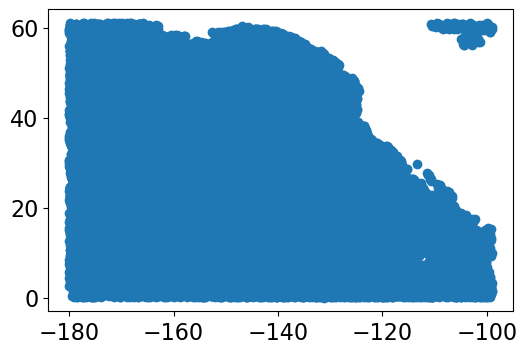

In [241]:
plt.scatter(m_dict['2015_manifest.csv']['lon'], m_dict['2015_manifest.csv']['lat'])

In [270]:
all_unified_files = glob.glob(r'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/all_unified/*.csv')
df = pd.DataFrame(columns=('name', 'date', 'lat', 'lon', 'i', 'j', 'sensor_zenith', 'high_cf', 'low_cf', 'refl_img', 'context_img'))
for f in all_unified_files:
    table = pd.read_csv(f, index_col=0)
    table['loc'] = os.path.basename(f).split('_')[2]
    table['year'] = int(os.path.basename(f)[-8:-4])
    df = df.append(table, ignore_index=True)
savename = f'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/unified_table_all.csv'    # all_df.to_csv(savename)
df.to_csv(savename)

In [122]:
def plot_grouped_var_dists(grouped_df, varname, xlims=None, xlabel=None, ax=None, savename=None, verbose=False):
    if not ax:
        fig, ax = plt.subplots(figsize=(10,6))
    else:
        fig = ax.figure
    colors = [mpl.cm.get_cmap('viridis')(i) for i in np.linspace(0,1,6)]
    ordering = [4, 0, 2, 3, 1, 5]
    for i, name in enumerate(ordering):
        group = grouped.get_group(name)
        if verbose:
            print(short_labels[name]+':', len(group), sum(~np.isnan(group[varname].values)))
        sns.distplot(group[varname].values, hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 3},
                     label = short_labels[name], color=colors[i], ax=ax)
        if xlims:
            ax.set_xlim(xlims)
        if xlabel:
            ax.set_xlabel(xlabel)
        ax.set_ylabel("normed density")
        ax.set_yticklabels
        if savename:
            fig.savefig(savename, bbox_inches='tight')
        
    return fig, ax

(<Figure size 1000x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8c701aa908>)

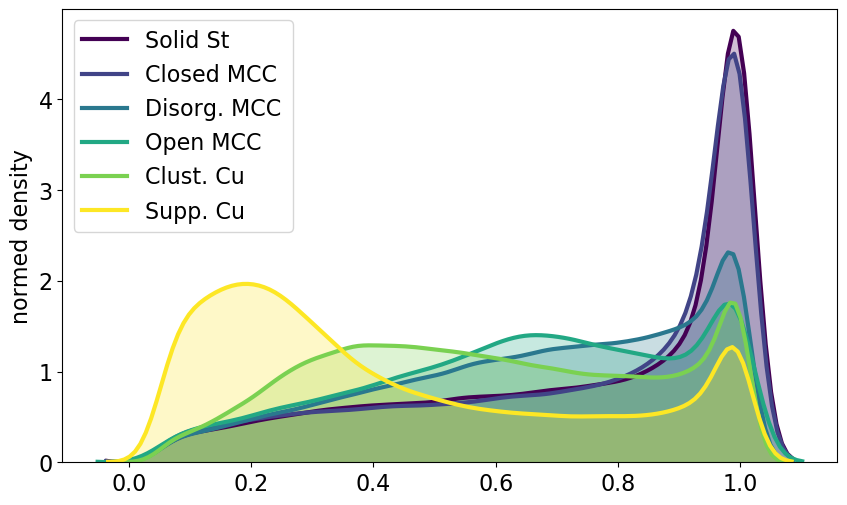

In [144]:
plot_grouped_var_dists(grouped, varname='low_cf')

In [ ]:
# pred_file = r'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/cset_region/model_predictions.npz'
# data = np.load(pred_file)
# table_file = r'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/cset_region/2015_manifest.csv'
# table_file_2 = r'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/cset_region/2015_manifest_allfiles.csv'
# predictions = np.load(pred_file)
# table_headers = ('name', 'date', 'lat', 'lon', 'i', 'j', 'sensor_zenith', 'high_cf', 'low_cf', 'refl_img', 'context_img')
# table = pd.read_csv(table_file, names = table_headers, parse_dates=['date'])
# table2 = pd.read_csv(table_file_2, names = table_headers, parse_dates=['date'])
# labels={0: 'Closed-cellular MCC', 1: 'Clustered cumulus', 2: 'Disorganized MCC',
#         3: 'Open-cellular MCC', 4: 'Solid Stratus', 5: 'Suppressed Cu'}

In [ ]:
savename=r'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/all_unified/unified_table_NEP_2015.csv'
all_df = pd.read_csv(savename)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,5), sharex=True, sharey=True)
axn = ax.flatten()
for cat, name  in labels.items():
    df_sub = all_df[all_df['cat']==cat]
    llr = {'lat':(0,65), 'lon':(-180,-100)}
    par_labs = [1, 0, 0, 0] if cat in [0, 3] else [0, 0, 0, 0]
    mer_labs = [0, 0, 0, 1] if cat in [3, 4, 5] else [0, 0, 0, 0]
    b = utils.bmap(ax=axn[cat], llr=llr, par_labs=par_labs, mer_labs=mer_labs, merspace=25)
    b.hexbin(df_sub['lon'], df_sub['lat'], gridsize=30)
    nstr = f"n={sum(df_sub['cat']==cat)}\n({int(sum(df_sub['cat']==cat)*100/len(all_df))}%)"
    axn[cat].set_title(name)
    axn[cat].annotate(nstr, xy=(1, 0.8), xycoords='axes fraction', fontsize=9, c='r', ha='right')

# fig.savefig('/home/disk/p/jkcm/plots/measures/cset_all_classifications_map.png', bbox_inches='tight')

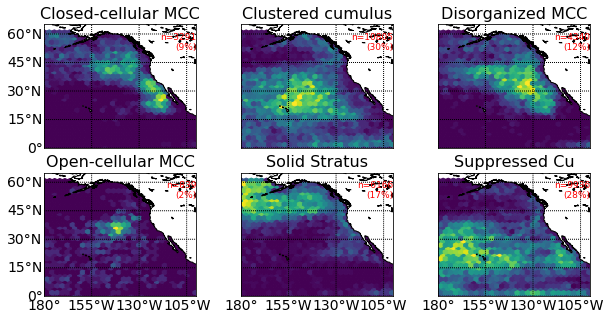

In [5]:
savename=r'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/all_unified/unified_table_NEP_2015.csv'
all_df = pd.read_csv(savename)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,5), sharex=True, sharey=True)
axn = ax.flatten()
for cat, name  in labels.items():
    df_sub = all_df[all_df['cat']==cat]
    llr = {'lat':(0,65), 'lon':(-180,-100)}
    par_labs = [1, 0, 0, 0] if cat in [0, 3] else [0, 0, 0, 0]
    mer_labs = [0, 0, 0, 1] if cat in [3, 4, 5] else [0, 0, 0, 0]
    b = utils.bmap(ax=axn[cat], llr=llr, par_labs=par_labs, mer_labs=mer_labs, merspace=25)
    b.hexbin(df_sub['lon'], df_sub['lat'], gridsize=30)
    nstr = f"n={sum(df_sub['cat']==cat)}\n({int(sum(df_sub['cat']==cat)*100/len(all_df))}%)"
    axn[cat].set_title(name)
    axn[cat].annotate(nstr, xy=(1, 0.8), xycoords='axes fraction', fontsize=9, c='r', ha='right')

# fig.savefig('/home/disk/p/jkcm/plots/measures/cset_all_classifications_map.png', bbox_inches='tight')

(<Figure size 1000x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8c70132320>)

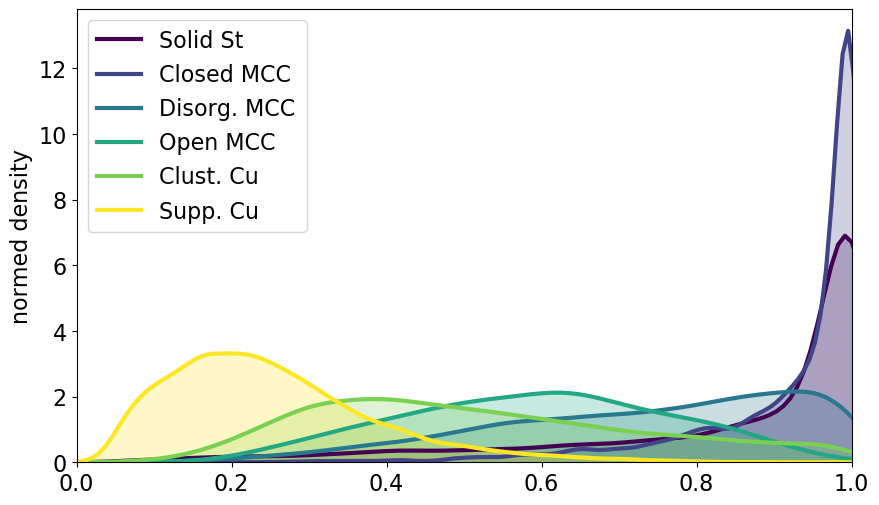

In [205]:
plot_dataframe_by_cat(all_df, varname='low_cf', xlims=(0,1))

In [207]:
np.nanmin(all_df.lat), np.nanmax(all_df.lat), np.nanmin(all_df.lon), np.nanmax(all_df.lon)

(0.00157989258878, 60.9975128174, -179.999053955, -99.0242462158)